# Test the CNN Model on Homogeneous Neurons - Figure 3

In [1]:
# Load General Modules
%matplotlib inline
import matplotlib
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
from scipy.stats import chi
import scipy as sp
from scipy import signal
from sklearn import linear_model
import pickle
import datetime
import time
import os
%load_ext autoreload
%autoreload 2

# Local modules (scripts need to be in folder)
import CNN
import generate_neurons
import generate_data
import pre_process
import GLMs
import training

# Tensorflow needs to be LAST import
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.4/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


1.0.0


## Fig 3a: Visualize simple model neurons

generate neurons 0.0 finished


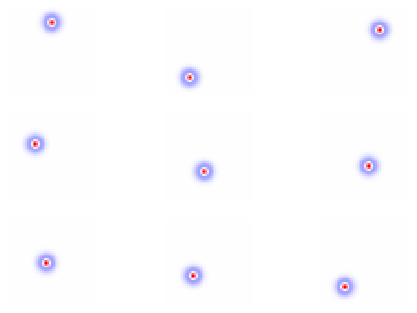

In [2]:
#Seeds
np_seed=1
np.random.seed(np_seed)
tf_seed=1

#Parameters:
s=[48,1,32]#sizes of [image(heigth=width), image(depth=channel), mask]
sk=[17]#width=heigth of receptive field and conv kernel
mr=.1#mean response
N=9#neurons

#generate and show neurons
RF,True_Kernel,True_Locations = generate_neurons.generate_neurons(N,s[0],sk[0],
                   target_mean_count=mr,centering=True,types=1,variation=0,np_seed=np_seed)
generate_neurons.visualize(RF)

## Simple Interface to manually adjust parameters and test model behaviour

generate neurons 0.0 finished


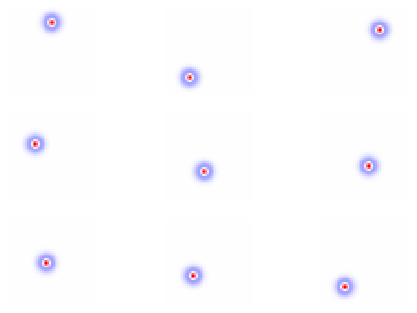

start generating data
it took 7.447089910507202 s to generate neurons and data
Before Training:
Total FEV =  -0.0342620611191
Loss/Regularization: 0.0162985 MSE, 0.0 kernel, 0.0950742840767 mask, 0.0 weights


/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1313: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


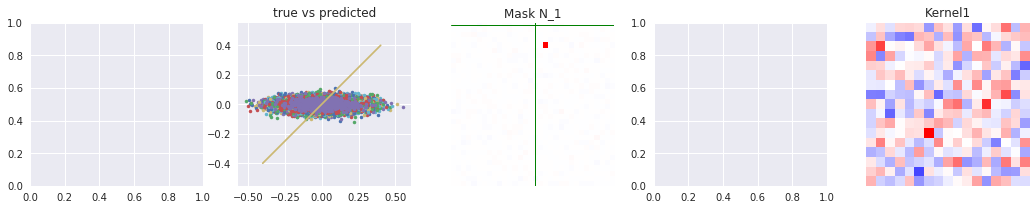

Total FEV =  0.0935128331184
Runs: 100; MSE - train: 0.0889032, val: 0.114996; lr = 0.001
best run:  100 0.114996
Loss/Regularization: 0.0142849 MSE, 0.0 kernel, 0.0359281301498 mask, 0.0 weights


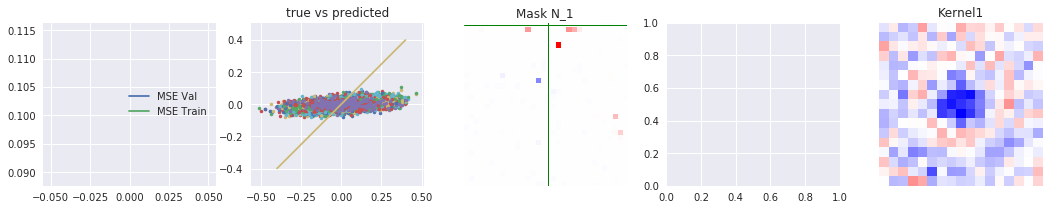

Total FEV =  0.123249351978
Runs: 200; MSE - train: 0.0864543, val: 0.114375; lr = 0.001
best run:  200 0.114375
Loss/Regularization: 0.0138163 MSE, 0.0 kernel, 0.0349994421005 mask, 0.0 weights


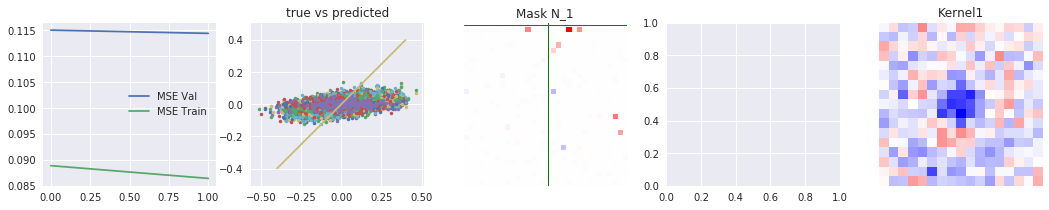

Total FEV =  0.17581653595
Runs: 300; MSE - train: 0.085428, val: 0.113484; lr = 0.001
best run:  300 0.113484
Loss/Regularization: 0.0129879 MSE, 0.0 kernel, 0.0351545482874 mask, 0.0 weights


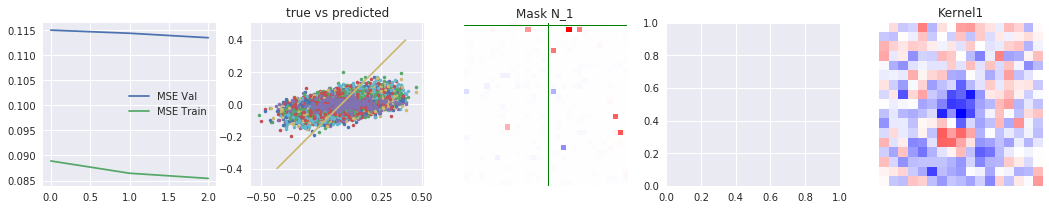

Total FEV =  0.321393787861
Runs: 400; MSE - train: 0.0850272, val: 0.110465; lr = 0.001
best run:  400 0.110465
Loss/Regularization: 0.0106938 MSE, 0.0 kernel, 0.0346072822809 mask, 0.0 weights


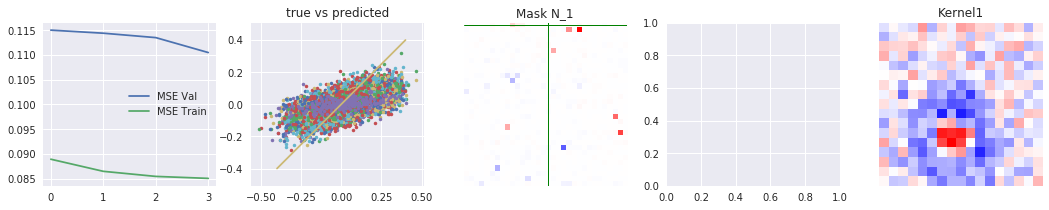

Total FEV =  0.424482285976
Runs: 500; MSE - train: 0.0846512, val: 0.108077; lr = 0.001
best run:  500 0.108077
Loss/Regularization: 0.00906932 MSE, 0.0 kernel, 0.034278434515 mask, 0.0 weights


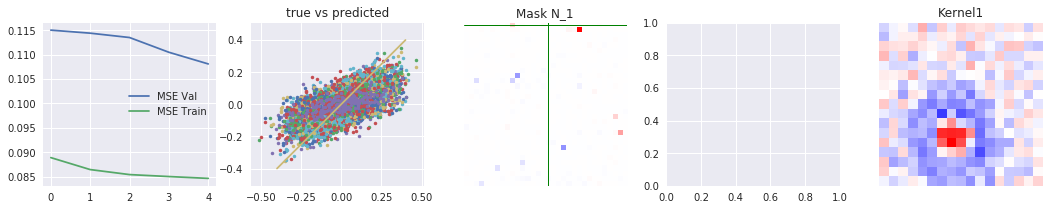

Total FEV =  0.448393881321
Runs: 600; MSE - train: 0.0844206, val: 0.107366; lr = 0.001
best run:  600 0.107366
Loss/Regularization: 0.00869251 MSE, 0.0 kernel, 0.034100830555 mask, 0.0 weights


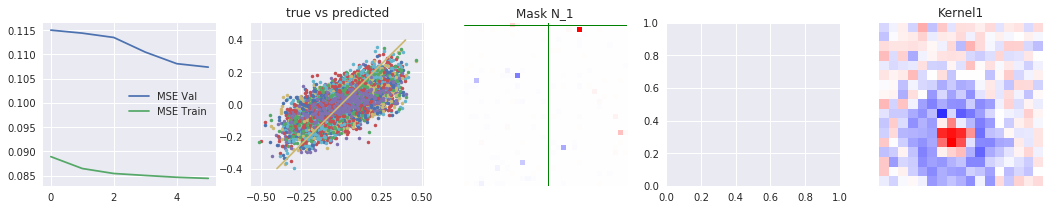

Total FEV =  0.452446222305
Runs: 700; MSE - train: 0.0840448, val: 0.107197; lr = 0.001
best run:  700 0.107197
Loss/Regularization: 0.00862865 MSE, 0.0 kernel, 0.034416243434 mask, 0.0 weights


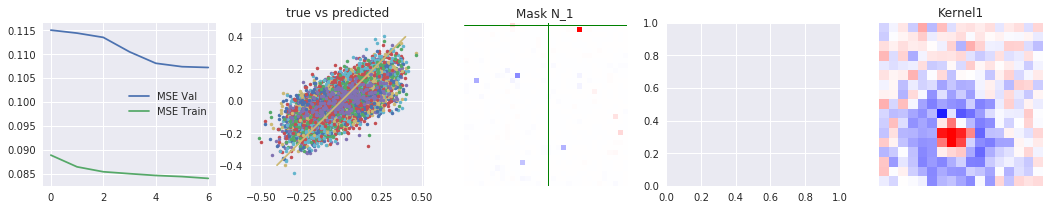

Total FEV =  0.452532947063
Runs: 800; MSE - train: 0.0838427, val: 0.107215; lr = 0.001
best run:  700 0.107197
Loss/Regularization: 0.00862728 MSE, 0.0 kernel, 0.0344682127237 mask, 0.0 weights


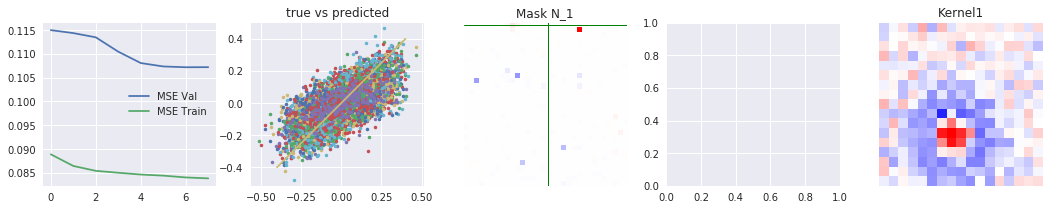

Total FEV =  0.447754144669
Runs: 900; MSE - train: 0.0836839, val: 0.107345; lr = 0.001
best run:  700 0.107197
Loss/Regularization: 0.00870259 MSE, 0.0 kernel, 0.034569466114 mask, 0.0 weights


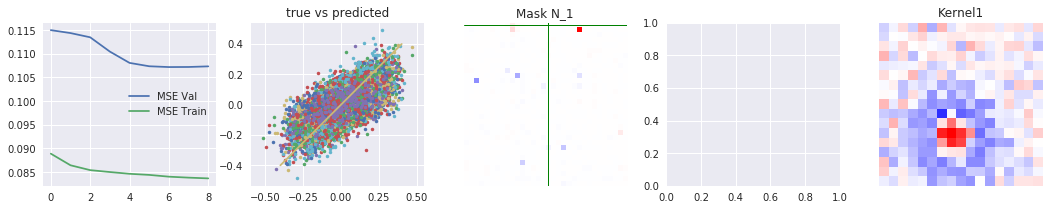

Total FEV =  0.444185674191
Runs: 1000; MSE - train: 0.0834684, val: 0.107366; lr = 0.001
best run:  700 0.107197
Loss/Regularization: 0.00875882 MSE, 0.0 kernel, 0.0347258597612 mask, 0.0 weights


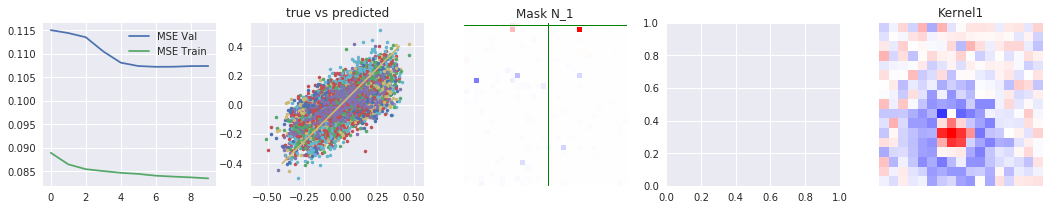

Total FEV =  0.441207587719
Runs: 1100; MSE - train: 0.083444, val: 0.107401; lr = 0.001
best run:  700 0.107197
Loss/Regularization: 0.00880575 MSE, 0.0 kernel, 0.0346254765987 mask, 0.0 weights


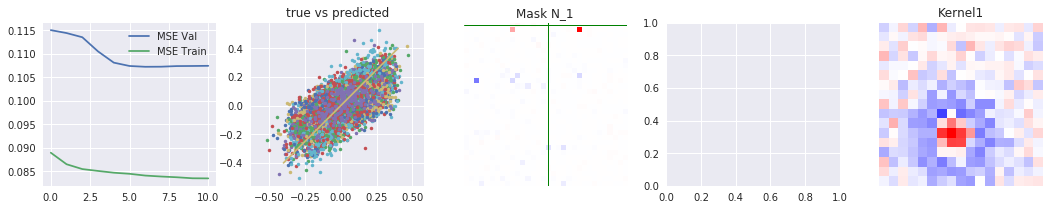

Total FEV =  0.441344082355
Runs: 1200; MSE - train: 0.0833867, val: 0.107249; lr = 0.001
best run:  700 0.107197
Loss/Regularization: 0.0088036 MSE, 0.0 kernel, 0.0346388429403 mask, 0.0 weights


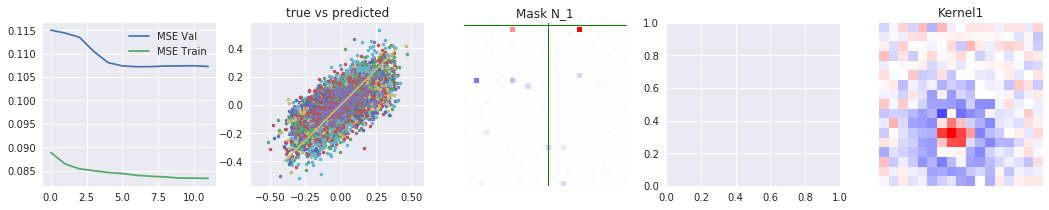

Total FEV =  0.448566555977
Runs: 1300; MSE - train: 0.0866864, val: 0.107339; lr = 0.0001
best run:  700 0.107197
Loss/Regularization: 0.00868979 MSE, 0.0 kernel, 0.0204363465309 mask, 0.0 weights


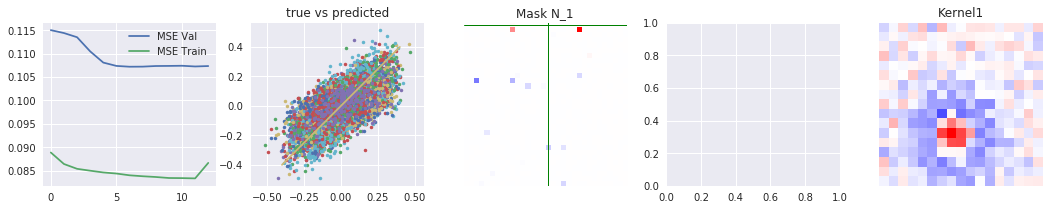

Total FEV =  0.446597635746
Runs: 1400; MSE - train: 0.086404, val: 0.107367; lr = 0.0001
best run:  700 0.107197
Loss/Regularization: 0.00872081 MSE, 0.0 kernel, 0.0206986606121 mask, 0.0 weights


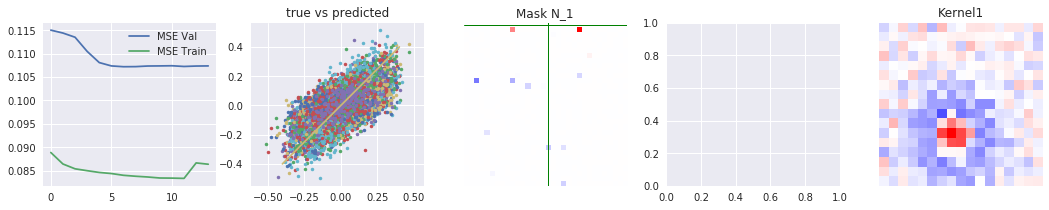

Total FEV =  0.445605754852
Runs: 1500; MSE - train: 0.0862399, val: 0.107399; lr = 0.0001
best run:  700 0.107197
Loss/Regularization: 0.00873644 MSE, 0.0 kernel, 0.020854178071 mask, 0.0 weights


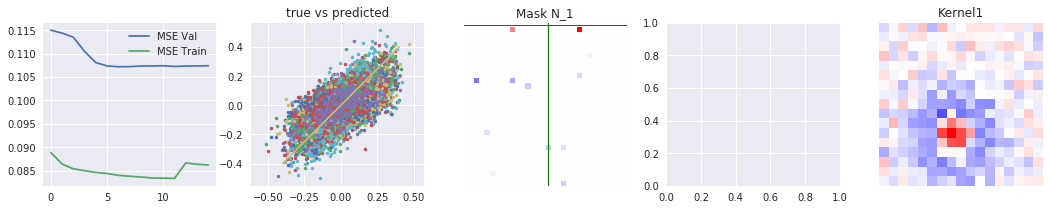

Total FEV =  0.445554196835
Runs: 1600; MSE - train: 0.0861527, val: 0.107388; lr = 0.0001
best run:  700 0.107197
Loss/Regularization: 0.00873726 MSE, 0.0 kernel, 0.0209281295538 mask, 0.0 weights


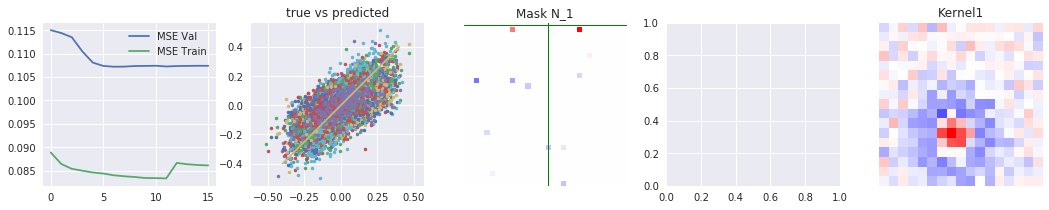

Total FEV =  0.446077167988
Runs: 1700; MSE - train: 0.0861021, val: 0.107377; lr = 0.0001
best run:  700 0.107197
Loss/Regularization: 0.00872901 MSE, 0.0 kernel, 0.0209686040878 mask, 0.0 weights


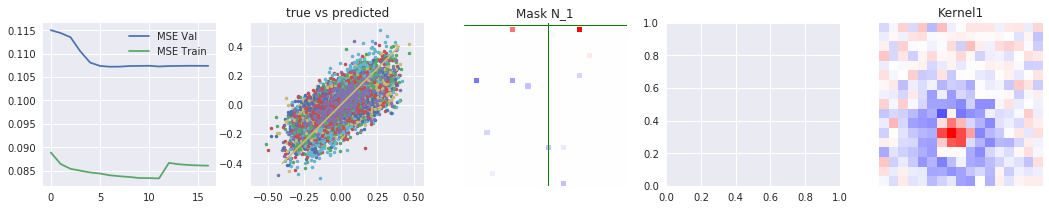

Total FEV =  0.446933627129
Runs: 1800; MSE - train: 0.0865318, val: 0.107395; lr = 1e-05
best run:  700 0.107197
Loss/Regularization: 0.00871552 MSE, 0.0 kernel, 0.0194592908025 mask, 0.0 weights


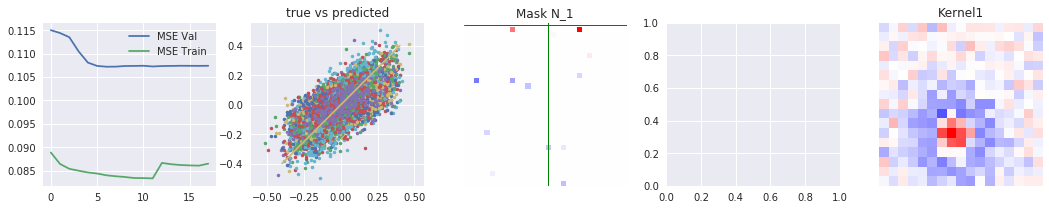

Total FEV =  0.44759953022
Runs: 1900; MSE - train: 0.0865229, val: 0.107389; lr = 1e-05
best run:  700 0.107197
Loss/Regularization: 0.00870502 MSE, 0.0 kernel, 0.0194655150175 mask, 0.0 weights


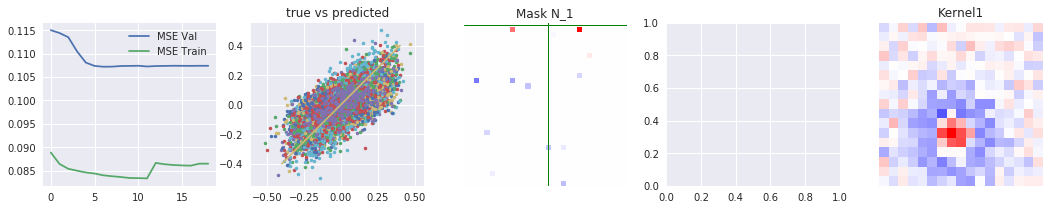

Total FEV =  0.448057711124
Runs: 2000; MSE - train: 0.0865068, val: 0.107386; lr = 1e-05
best run:  700 0.107197
Loss/Regularization: 0.0086978 MSE, 0.0 kernel, 0.0194801658392 mask, 0.0 weights


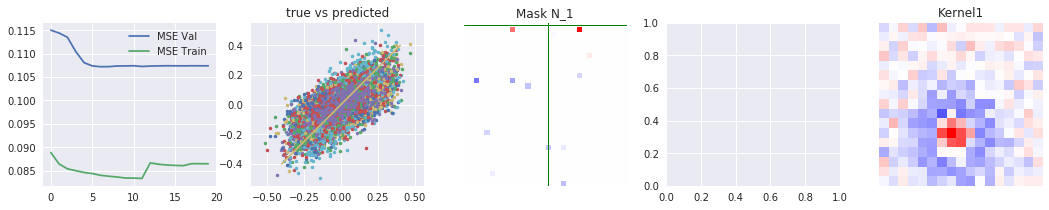

Total FEV =  0.448406398296
Runs: 2100; MSE - train: 0.0864887, val: 0.107384; lr = 1e-05
best run:  700 0.107197
Loss/Regularization: 0.00869231 MSE, 0.0 kernel, 0.0194974556565 mask, 0.0 weights


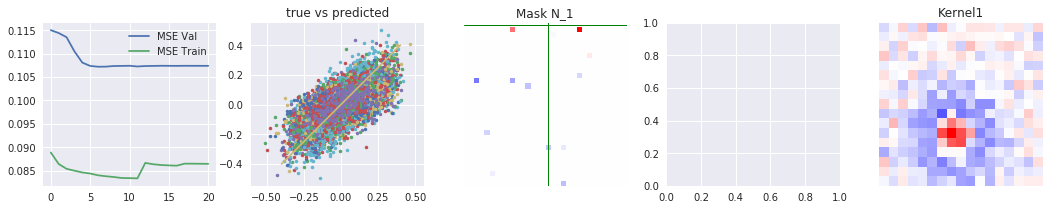

Total FEV =  0.448688983917
Runs: 2200; MSE - train: 0.0864718, val: 0.107384; lr = 1e-05
best run:  700 0.107197
Loss/Regularization: 0.00868786 MSE, 0.0 kernel, 0.0195128768682 mask, 0.0 weights


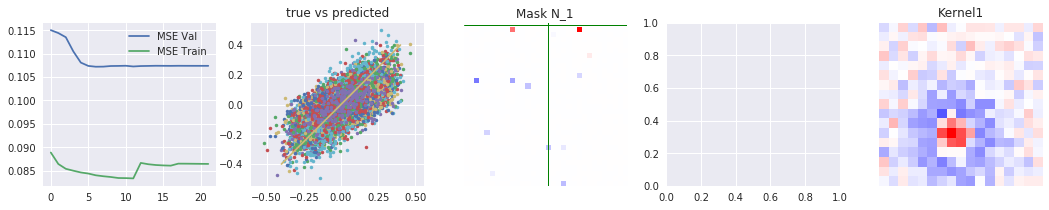

('Stop at run 2200; MSE on validation set: 0.107197', 'MSE on test set: 0.00862865; Mean FEV: 0.452694')
run took 38.747819900512695 s to optimize


Text(0,0.5,'FEV')

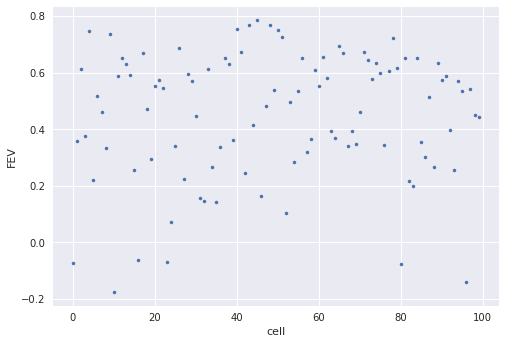

In [3]:
#Suggestion: use this to get an intuition for the range of regularization values
#for different numbers of neurons to be gridsearched over below

start = time.time()
#Seeds
np_seed=1
np.random.seed(np_seed)
tf_seed=1

#Parameters:
s=[48,1,32]#sizes of [image(heigth=width), image(depth=channel), mask]
sk=[17]#width=heigth of receptive field and conv kernel
mr=.1#mean response
N=100#neurons
D=2**8#data points per neuron

init_scales = np.array([[0,.01],[0,.001],[1,.1]])#Mean/SD for Kernel,Mask,Weights
lr= .001 # initial learning rate
num_kern = [1]#number of bases (conv kernels) to learn per layer
reg = [0,.1,0,0]#regularization parameters: L2 Kernels, L1 Mask, L1 Weights, Dropout
max_runs = 10000 # training steps
batch_size = 512
act_fn=['ID']#activation function per layer in model
kernel_constraint=None
weights_constraint=None#'norm'#constrain read out weights to norm=1
stop_crit = [5,3]#[after how many worse steps lower lr, lower how many times]
burn_in=0#allow for burn_in*100 initial runs without triggering stop criterion
split_data=False#set true for large nets to fit on GPU memory


#generate and show neurons
RF,True_Kernel,True_Locations = generate_neurons.generate_neurons(N,s[0],sk[0],
                   target_mean_count=mr,centering=True,types=1,variation=0,np_seed=np_seed)
generate_neurons.visualize(RF)

#calculate standard deviation of neural responses (to set output scale)
sd=pre_process.noise_cancel(RF,100,rep=30,np_seed=np_seed)

#generate data
X_train,X_val,X_test,Y_train,Y_val,GT_test = generate_data.generate_data(RF=RF,tf_seed=tf_seed,
                     num_train=np.int(D*.8),num_val=np.int(D*.2),num_test = 10**4,noise=True)

#calculate spike triggered average to initialize location masks
_,sta=pre_process.STA(X_train,Y_train,32,sk[0])

#NCHW format
X_train=np.reshape(X_train,[s[0],s[0],-1]).transpose([2, 0, 1])[:,None,:,:]
X_val=np.reshape(X_val,[s[0],s[0],-1]).transpose([2, 0, 1])[:,None,:,:]
X_test=np.reshape(X_test,[s[0],s[0],-1]).transpose([2, 0, 1])[:,None,:,:]

print('it took %s s to generate neurons and data'%(time.time()-start))


#Train Model
start = time.time()
(WK,WM,WW,MSE_train,MSE_val,_,MSE_test,FEV,FEV_cell,Y_,
log,_,_) = training.train(s=s,#        sizes of [image(heigth=width), image(depth=channel), mask]
          sK=sk,#        s - sizes of [kernel1, kernel2, ...] - length of list gives number of layers
          act_fn=act_fn,#      activation functions for each kernel = 'ID' or 'relu'
          init_scales=init_scales,# rows: kernel,mask,weights; columns: mean, sd
          init_lr=lr,# initial learning rate, goes down later
          num_kern=num_kern,#        num_kern - number of kernels per conv layer
          max_runs=max_runs,# maximum number of training steps
          reg=reg,#        regularization weights [Kernel,Mask,Weights]
          batch_size=batch_size,# (max gpu memory?)256 for small one layer, 64 for large multilayer model
          X_train=X_train,
          X_val=X_val,
          X_test=X_test,
          Y_train=Y_train,
          Y_val=Y_val,
          GT_test=GT_test,#Data, X in NCHW format, Y: Neurons x Data
          kernel_constraint=kernel_constraint,#constraint for kernel weights - 'norm' == 1
          weights_constraint=weights_constraint,#constraint on read out weights - 'abs','norm','absnorm'
          mask_constraint=None,#constraint on mask - 'abs'
          final_relu=False,
          stop_crit=stop_crit,#[after how many worse steps lower lr, lower how many times]
          burn_in=burn_in,#allow initial exploration of 100*burn_in runs 
          types=[0],#starting indices of types, default=all same type
          GT_mask=True_Locations,#true locations if known: rows:neurons, columns: x,y location
          tf_seed=tf_seed,#random seed for tensorflow
          np_seed=np_seed,
          split_data=split_data,#whether to go through test and val set in batch_size chunks
          sta=sta,#if provided, take maximum absolute pixel of sta to initialize mask
          sd=sd,#standard deviation of responses, to set the scale
          GT_WK=None,#initialize first conv kernel?
          batch_norm=True,#whether to use batch norm
          bn_cent=False,#center after batch norm?
          verbose='yes')#print training outcome and learned filters every 100 steps, 'yes','no','minimal'



print('run took %s s to optimize'%(time.time()-start))
#Plot Model performance on individual cells
plt.plot(FEV_cell,'.')
plt.xlabel('cell')
plt.ylabel('FEV')

## GLM Grid search and Evaluation

In [ ]:
# Now fit for the different amounts of data

start_time = time.time()

start = time.time()
#Seeds
np_seed=1
np.random.seed(np_seed)
tf_seed=1

#Parameters:
s=48#sizes of [image(heigth=width), image(depth=channel), mask]
s2=17#width=heigth of receptive field and conv kernel
mr=.1#mean response
N=1#neurons

#Neuron
_,GT_W1,_ = generate_neurons.generate_neurons(N,s,s2)#just to get one perfect centered DoG

#Regularization
r_las = [.00001,.00003,.0001,.0003,.001,.003,.01,.03,.1,.3]
r_rid = [10,100,300,1000,1500,2000,2500,3000,5000,8000,10000,15000,20000]

#Amount of data for testing
data_set = 2**np.arange(6,21)

#loop parameters
max_rep = 20 # of the whole training, per datasize

#Storing results:
#Indexing will be: Variable[data_set,regularization,repetition]=value
FEVl = np.zeros([len(data_set),len(r_las),max_rep])
FEVr = np.zeros([len(data_set),len(r_rid),max_rep])
MSE_val_l = np.zeros([len(data_set),len(r_las),max_rep])
MSE_val_r = np.zeros([len(data_set),len(r_rid),max_rep])
#no reg
FEVo = np.zeros([len(data_set),max_rep])
#Indexing will be: Variable[data_set,regularization,repetition]=17x17
Wl = np.zeros([len(data_set),len(r_las),max_rep,s2,s2])
Wr = np.zeros([len(data_set),len(r_rid),max_rep,s2,s2])
#no reg
Wo = np.zeros([len(data_set),max_rep,s2,s2])

#Saving intermediate results:
run={'note': 'GLM, homogeneous neurons',
     'r_las':r_las,
     'r_rid':r_rid,
     'data_set': data_set,
     'max_rep': max_rep,
     'mr':mr,
     's,s2':[s,s2],
     'done': 0,
     'time': [0],
     'GT_W1':GT_W1,
     'FEV_lasso':FEVl,
     'FEV_rid':FEVr,
     'FEV_ols':FEVo,
     'MSE_val_rid':MSE_val_r,
     'MSE_val_lasso':MSE_val_l,
     'Wo':Wo,
     'Wl':Wl,
     'Wr':Wr}

with open('GLM_running','wb') as file:
    pickle.dump(run, file)
    
for rep in range(max_rep):#loop over repetitions
    print('Repetition %s / %s'%(rep+1,max_rep))

    #Generate one test set
    num_test = 10**4
    _,_,X_test,_,_,Y_test = generate_data.generate_data(GT_W1.reshape([1,s2**2]),
                            num_train=1,num_val=1,tf_seed=tf_seed,
                            num_test=num_test,noise=True)
    
    #calculate test variance
    gt_test_var = np.var(Y_test)#explainable output variance
    
    #Loop over data sizes
    for d in range(len(data_set)):
        print('Dataset %s / %s, Data = %s'%(d+1,len(data_set),data_set[d]))
        
        num_val=np.int(data_set[d]*.2)
        num_train=data_set[d]-num_val
        
        #Generate training data
        X_train,X_val,_,Y_train,Y_val,_ = generate_data.generate_data(GT_W1.reshape([1,s2**2]),
                                            num_train=num_train,num_val=num_val,tf_seed=tf_seed,
                                            num_test=1,noise=True)
        
        #OLS
        RF_est = GLMs.ols(X=np.hstack([X_train,X_val]),Y=np.hstack([Y_train,Y_val]))
        Wo[d,rep,:,:] = RF_est.reshape([s2,s2])
        #FEV - fraction of explainable variance
        Y_est = RF_est.dot(X_test)
        residuals = Y_est - Y_test
        MSE = np.mean(residuals**2)
        FEVo[d,rep] = 1 - (MSE/gt_test_var)
    
        #RIDGE - Try different regularization strengths
        for r in range(len(r_rid)):
            print('Start for regularization: Ridge=%s'%(r_rid[r]))
            
            #Ridge
            RF_est = GLMs.ridge(r_rid[r],X_train,Y_train)
            Wr[d,r,rep,:,:] = RF_est.reshape([s2,s2])
            #FEV - fraction of explainable variance
            MSE_val_r = np.mean((Y_val-RF_est.dot(X_val))**2,1)
            Y_est = RF_est.dot(X_test)
            residuals = Y_est - Y_test
            MSE = np.mean(residuals**2,1)
            FEVr[d,r,rep] = 1 - (MSE/gt_test_var)

        
        #LASSO - Try different regularization strengths
        for r in range(len(r_las)):
            print('Start for regularization: Lasso=%s'%(r_las[r]))

            #Lasso
            RF_est = GLMs.lasso(r_las[r],X_train,Y_train)
            Wl[d,r,rep,:,:] = RF_est.reshape([s2,s2])
            #FEV - fraction of explainable variance
            MSE_val_l = np.mean((Y_val-RF_est.dot(X_val))**2,1)
            Y_est = RF_est.dot(X_test)
            residuals = Y_est - Y_test
            MSE = np.mean(residuals**2,1)
            FEVl[d,r,rep] = 1 - (MSE/gt_test_var)
        
            
        #intermediate output
        #percentage of finished runs:
        run['done'] = (rep + d/len(data_set)) / max_rep
        run['time'].append(time.time() - start_time)
        run['FEV_ols'] = FEVo
        run['FEV_lasso'] = FEVl
        run['FEV_rid'] = FEVr
        run['Wo'] = Wo
        run['Wr'] = Wr
        run['Wl'] = Wl
        

        with open('GLM_running','wb') as file:
            pickle.dump(run, file)


#Save
with open('GLM_homogeneous','wb') as file:
    pickle.dump(run, file)

## CNN Model for different amounts of data and regularization

In [ ]:
# TESTING FOR DIFFERENT POPULATION SIZES AND MULTIPLE RUNS
start_time = time.time()

#Seeds
np_seed=1
np.random.seed(np_seed)
tf_seed=1

#Parameters:
s=[48,1,32]#sizes of [image(heigth=width), image(depth=channel), mask]
sk=[17]#width=heigth of receptive field and conv kernel
mr=.1#mean response
N=[1,10,100,1000]#neurons
init_scales = np.array([[0,.01],[0,.001],[1,.1]])#Mean/SD for Kernel,Mask,Weights
lr= .001 # initial learning rate
num_kern = [1]#number of bases (conv kernels) to learn per layer
max_runs = 10000 # training steps
batch_size = 256
act_fn=['ID']#activation function per layer in model
kernel_constraint=None
weights_constraint='norm'#constrain read out weights to norm=1
stop_crit = [5,3]#[after how many worse steps lower lr, lower how many times]
burn_in=0#allow for burn_in*100 initial runs without triggering stop criterion
split_data=False#set true for large nets to fit on GPU memory

#Regularization
reg = [0,None,0,0]#regularization parameters: L2 Kernels, L1 Mask(below), L1 Weights, Dropout
r=np.zeros([len(N),10])
r[0,:]=np.geomspace(.001,1,10)#np.linspace(.0001,.5,15)#N=1
r[1,:]=np.geomspace(.001,1,10)#np.linspace(.001,.3,15)#N=10
r[2,:]=np.geomspace(.001,1,10)#np.linspace(.001,.3,15)#N=100
r[3,:]=np.geomspace(.001,1,10)#np.linspace(.001,.3,15)#N=1000

#Amount of data for testing
data_set = 2**(np.arange(6,21))#64 - 1Million
num_test  = 10**4# number of test stimuli

#loop parameters
max_rep = 20 # of the whole training, per datasize
#split this into: 3 initial runs to find optimal reg, than repetitions with optimal reg?
#reg_rep = 3

#Storing results:
#Indexing: Variable[repetition][N][data_set][regularization]=np.array
WK = []
WM = []
WW = []
Y_pred = []
#Indexing: Variable[repetition][N][data_set][regularization]=list
MSE_train = []
MSE_val = []
FEV_cell = []
#Indexing: Variable[repetition, N, data_set, regularization]=scalar
MSE_test = np.zeros([max_rep,len(N),len(data_set),r.shape[1]])
FEV = np.zeros([max_rep,len(N),len(data_set),r.shape[1]])
#Indexing: Variable[rep][N]=np.array
ind_N = []#which neurons are chosen from whole population
#Indexing: Variable[rep]=np.array
Y_true = []

#Generate Neurons
All_RF,_,_ = generate_neurons.generate_neurons(N[-1],s[0],sk[0])
#calculate noise-averaged-out stddev
All_sd = pre_process.noise_cancel(RF=All_RF,D=100,rep=30,np_seed=np_seed)

#Saving intermediate results:
run={'note': 'CNN, homogeneous neurons',
     'N':N,
     'reg':reg,
     'r':r,
     'lr':lr,
     'init_scales': init_scales,
     'data_set': data_set,
     'max_runs':max_runs,
     'max_rep': max_rep,
     'mr':mr,
     's':s,
     'sk':sk,
     'batch size': batch_size,
     'done': 0,
     'time': [0],
     'WK':WK,
     'WM':WM,
     'WW':WW,
     'MSE_train':MSE_train,
     'MSE_val':MSE_val,
     'MSE_test':MSE_test,
     'FEV':FEV,
     'FEV_cell':FEV_cell,
     'Y_pred':Y_pred,
     'Y_true':Y_true,
     'RF':All_RF,
     'sd':All_sd,
     'ind_N':ind_N}

#maximum number of neurons for saving Y_pred, WM, WW
max_save=N[-1]#save all responses and masks

with open('CNN_running','wb') as file:
    pickle.dump(run, file)
    
#saving text output to log file
with open("log.txt", "w") as log:
    print('start on 01/01/2017 00:00 \n', file=log)
    
    
# ------------  S T A R T  -----------------
# you can observe the detailled progress in log.txt

for rep in range(max_rep):#repetitions
    with open("log.txt", "a") as log:
        print('repetition %s / %s'%(rep,max_rep), file=log)

    WK.append([])
    WM.append([])
    WW.append([])
    Y_pred.append([])
    Y_true.append([])
    ind_N.append([])
    MSE_train.append([])
    MSE_val.append([])
    FEV_cell.append([])
    
    ##generate data
    All_X_train,All_X_val,All_X_test,All_Y_train,All_Y_val,All_Y_test = generate_data.generate_data(
                                    RF=All_RF,num_train=data_set[-1],num_val=0,num_test = num_test,
                                    noise=True,tf_seed=tf_seed)#put train and val together, separate below
                
    Y_true[rep].append(All_Y_test[:max_save,:])

    for n in range(len(N)):#over # of neurons
        with open("log.txt", "a") as log:
            print('Neurons = %s, %s out of %s \n'%(N[n],n,len(N)), file=log)

        WK[rep].append([])
        WM[rep].append([])
        WW[rep].append([])
        Y_pred[rep].append([])
        MSE_train[rep].append([])
        MSE_val[rep].append([])
        ind_N[rep].append([])
        FEV_cell[rep].append([])

        #sample neurons
        ind_N_tmp = np.random.choice(N[-1],N[n],replace=False)
        RF = All_RF[ind_N_tmp,:]
        sd = All_sd[ind_N_tmp]
        Y_test = All_Y_test[ind_N_tmp,:]
        Y_tmp = All_Y_train[ind_N_tmp,:]
        ind_N[rep][n] = ind_N_tmp

        for d in range(len(data_set)):#over data sizes
            with open("log.txt", "a") as log:
                print('Data = %s, %s out of %s'%(data_set[d],d,len(data_set)), file=log)

            WK[rep][n].append([])
            WM[rep][n].append([])
            WW[rep][n].append([])
            Y_pred[rep][n].append([])
            MSE_train[rep][n].append([])
            MSE_val[rep][n].append([])
            FEV_cell[rep][n].append([])
            
            #sample data
            tmp_num_val = min(int(data_set[d]*.2),10**4)#limit validation set size to test set size
            ind_D_tmp = np.random.permutation(data_set[-1])
            X_train = All_X_train[:,ind_D_tmp[:data_set[d]-num_val]]
            Y_train = Y_tmp[:,ind_D_tmp[:data_set[d]-num_val]].reshape([N[n],-1])
            X_val = All_X_train[:,ind_D_tmp[data_set[d]-num_val:data_set[d]]]
            Y_val = Y_tmp[:,ind_D_tmp[data_set[d]-num_val:data_set[d]]].reshape([N[n],-1])
            
            #STA for initialization
            _,sta = pre_process.STA(All_X_train[:,ind_D_tmp[:data_set[d]]],
                                    Y_tmp[:,ind_D_tmp[:data_set[d]]],
                                    crop=s[2],smooth=sk[0])
            
            for r_ind in range(r.shape[1]):#over regularizations
                with open("log.txt", "a") as log:
                    print('Regularization = %s, %s out of %s'%(r[n,r_ind],r_ind,r.shape[1]), file=log)

                #insert regularization into parameter list for model
                reg[1] = r[n,r_ind]
                
                #NCHW format
                train=np.reshape(X_train,[s[0],s[0],-1]).transpose([2, 0, 1])[:,None,:,:]
                val=np.reshape(X_val,[s[0],s[0],-1]).transpose([2, 0, 1])[:,None,:,:]
                test=np.reshape(All_X_test,[s[0],s[0],-1]).transpose([2, 0, 1])[:,None,:,:]
                
                #Training:
                (tmp_WK,tmp_WM,tmp_WW,tmp_MSE_train,tmp_MSE_val,_,tmp_MSE_test,tmp_FEV,
                 tmp_FEV_cell,Y_,log_file,_,_) = training.train(s,sk,act_fn,init_scales,lr,num_kern,
                                                            max_runs,reg,batch_size,train,
                                                            val,test,Y_train,Y_val,Y_test,
                                                            kernel_constraint,
                                                            weights_constraint,stop_crit,burn_in,
                                                            GT_mask=np.array([]),np_seed=np_seed,
                                                            tf_seed=tf_seed,split_data=split_data,
                                                            sta=sta,sd=sd,verbose='no')
                
                with open("log.txt", "a") as log:
                    print(log_file, file=log)

                WK[rep][n][d].append(tmp_WK)
                WM[rep][n][d].append(tmp_WM[:,:max_save])
                WW[rep][n][d].append(tmp_WW[:,:max_save])
                Y_pred[rep][n][d].append(Y_[:max_save,:])
                MSE_train[rep][n][d].append(tmp_MSE_train)
                MSE_val[rep][n][d].append(tmp_MSE_val)
                MSE_test[rep,n,d,r_ind] = tmp_MSE_test
                FEV[rep,n,d,r_ind] = tmp_FEV
                FEV_cell[rep][n][d].append(tmp_FEV_cell)

                #intermediate output
                #percentage of finished runs:
                done = (rep+((n+((d+(r_ind/r.shape[1]))/len(data_set)))/len(N)))/max_rep

                run['done'] = done
                run['time'].append(time.time() - start_time)
                run['WK'] = WK
                run['WM'] = WM
                run['WW'] = WW
                run['MSE_train'] = MSE_train
                run['MSE_val'] = MSE_val
                run['MSE_test'] = MSE_test
                run['FEV'] = FEV
                run['FEV_cell'] = FEV_cell
                run['Y_pred'] = Y_pred
                run['Y_true'] = Y_true
                run['ind_N'] = ind_N

                with open('CNN_running','wb') as file:
                    pickle.dump(run, file)

#Save
with open('CNN_fixed','wb') as file:
    pickle.dump(run, file)

with open("log.txt", "a") as log:
    print('FINISHED in %s seconds'%(time.time()-start_time), file=log)

## Kernel known curve

In [ ]:
# to estimate the difficulty of the task of estimating the location mask
# i.e. with ground truth kernel given and fixed:
# go to CNN.py file and change (in layers) to trainable=False and set
# intializer to constant.initializer(init_kernel)... (just uncomment)
# this keeps the kernel fixed. Then go to training.py and add
# init_kernel=GT_WK to the model initialization
# Tip: different reg values may be needed here, and they seem to be more sensitive!

# TESTING FOR DIFFERENT AMOUNTS OF DATA AND MULTIPLE RUNS
start_time = time.time()

#Seeds
np_seed=1
np.random.seed(np_seed)
tf_seed=1

#Parameters:
s=[48,1,32]#sizes of [image(heigth=width), image(depth=channel), mask]
sk=[17]#width=heigth of receptive field and conv kernel
mr=.1#mean response
N=[100]#neurons
init_scales = np.array([[0,.01],[0,.001],[1,.1]])#Mean/SD for Kernel,Mask,Weights
lr= .001 # initial learning rate
num_kern = [1]#number of bases (conv kernels) to learn per layer
max_runs = 10000 # training steps
batch_size = 256
act_fn=['ID']#activation function per layer in model
weights_constraint='norm'#constrain read out weights to norm=1
stop_crit = [5,3]#[after how many worse steps lower lr, lower how many times]
burn_in=0#allow for burn_in*100 initial runs without triggering stop criterion
split_data=False#set true for large nets to fit on GPU memory

#Regularization
reg = [0,None,0,0]#regularization parameters: L2 Kernels, L1 Mask(below), L1 Weights, Dropout
r=np.zeros([len(N),10])
r[0,:]=np.geomspace(.001,1,10)#np.linspace(.001,.3,15)#N=10

#Amount of data for testing
data_set = 2**(np.arange(6,10))#64 - 1Million
num_test  = 10**4# number of test stimuli

#loop parameters
max_rep = 20 # of the whole training, per datasize
#split this into: 3 initial runs to find optimal reg, than repetitions with optimal reg?
#reg_rep = 3

#Storing results:
#Indexing: Variable[repetition][N][data_set][regularization]=np.array
WK = []
WM = []
WW = []
Y_pred = []
#Indexing: Variable[repetition][N][data_set][regularization]=list
MSE_train = []
MSE_val = []
FEV_cell = []
#Indexing: Variable[repetition, N, data_set, regularization]=scalar
MSE_test = np.zeros([max_rep,len(N),len(data_set),r.shape[1]])
FEV = np.zeros([max_rep,len(N),len(data_set),r.shape[1]])
#Indexing: Variable[rep][N]=np.array
ind_N = []#which neurons are chosen from whole population
#Indexing: Variable[rep]=np.array
Y_true = []

#Generate Neurons
All_RF,GT_WK,_ = generate_neurons.generate_neurons(N[-1],s[0],sk[0])
#reshape to right format, take only one because they are all the same
GT_WK = GT_WK[0,:].reshape([sk[0],sk[0],1,1])
#calculate noise-averaged-out stddev
All_sd = pre_process.noise_cancel(RF=All_RF,D=100,rep=30,np_seed=np_seed)

#Saving intermediate results:
run={'note': 'CNN, homogeneous neurons, kernel known',
     'N':N,
     'reg':reg,
     'r':r,
     'lr':lr,
     'init_scales': init_scales,
     'data_set': data_set,
     'max_runs':max_runs,
     'max_rep': max_rep,
     'mr':mr,
     's':s,
     'sk':sk,
     'batch size': batch_size,
     'done': 0,
     'time': [0],
     'WK':WK,
     'WM':WM,
     'WW':WW,
     'MSE_train':MSE_train,
     'MSE_val':MSE_val,
     'MSE_test':MSE_test,
     'FEV':FEV,
     'FEV_cell':FEV_cell,
     'Y_pred':Y_pred,
     'Y_true':Y_true,
     'RF':All_RF,
     'sd':All_sd,
     'ind_N':ind_N,
     'GT_WK':GT_WK}

#maximum number of neurons for saving Y_pred, WM, WW
max_save=N[-1]#save all responses and masks

with open('CNN_kernel-known_running','wb') as file:
    pickle.dump(run, file)
    
#saving text output to log file
with open("log_kernel-known.txt", "w") as log:
    print('start on 01/01/2017 00:00 \n', file=log)
    
    
# ------------  S T A R T  -----------------
# you can observe the detailled progress in log.txt

for rep in range(max_rep):#repetitions
    with open("log_kernel-known.txt", "a") as log:
        print('repetition %s / %s'%(rep,max_rep), file=log)

    WK.append([])
    WM.append([])
    WW.append([])
    Y_pred.append([])
    Y_true.append([])
    ind_N.append([])
    MSE_train.append([])
    MSE_val.append([])
    FEV_cell.append([])
    
    ##generate data
    All_X_train,All_X_val,All_X_test,All_Y_train,All_Y_val,All_Y_test = generate_data.generate_data(
                                    RF=All_RF,num_train=data_set[-1],num_val=0,num_test = num_test,
                                    noise=True,tf_seed=tf_seed)#put train and val together, separate below
                
    Y_true[rep].append(All_Y_test[:max_save,:])

    for n in range(len(N)):#over # of neurons
        with open("log_kernel-known.txt", "a") as log:
            print('Neurons = %s, %s out of %s \n'%(N[n],n,len(N)), file=log)

        WK[rep].append([])
        WM[rep].append([])
        WW[rep].append([])
        Y_pred[rep].append([])
        MSE_train[rep].append([])
        MSE_val[rep].append([])
        ind_N[rep].append([])
        FEV_cell[rep].append([])

        #sample neurons
        ind_N_tmp = np.random.choice(N[-1],N[n],replace=False)
        RF = All_RF[ind_N_tmp,:]
        sd = All_sd[ind_N_tmp]
        Y_test = All_Y_test[ind_N_tmp,:]
        Y_tmp = All_Y_train[ind_N_tmp,:]
        ind_N[rep][n] = ind_N_tmp

        for d in range(len(data_set)):#over data sizes
            with open("log_kernel-known.txt", "a") as log:
                print('Data = %s, %s out of %s'%(data_set[d],d,len(data_set)), file=log)

            WK[rep][n].append([])
            WM[rep][n].append([])
            WW[rep][n].append([])
            Y_pred[rep][n].append([])
            MSE_train[rep][n].append([])
            MSE_val[rep][n].append([])
            FEV_cell[rep][n].append([])
            
            #sample data
            tmp_num_val = min(int(data_set[d]*.2),10**4)#limit validation set size to test set size
            ind_D_tmp = np.random.permutation(data_set[-1])
            X_train = All_X_train[:,ind_D_tmp[:data_set[d]-num_val]]
            Y_train = Y_tmp[:,ind_D_tmp[:data_set[d]-num_val]].reshape([N[n],-1])
            X_val = All_X_train[:,ind_D_tmp[data_set[d]-num_val:data_set[d]]]
            Y_val = Y_tmp[:,ind_D_tmp[data_set[d]-num_val:data_set[d]]].reshape([N[n],-1])
            
            #STA for initialization
            _,sta = pre_process.STA(All_X_train[:,ind_D_tmp[:data_set[d]]],
                                    Y_tmp[:,ind_D_tmp[:data_set[d]]],
                                    crop=s[2],smooth=sk[0])
            
            for r_ind in range(r.shape[1]):#over regularizations
                with open("log_kernel-known.txt", "a") as log:
                    print('Regularization = %s, %s out of %s'%(r[n,r_ind],r_ind,r.shape[1]), file=log)

                #insert regularization into parameter list for model
                reg[1] = r[n,r_ind]
                
                #NCHW format
                train=np.reshape(X_train,[s[0],s[0],-1]).transpose([2, 0, 1])[:,None,:,:]
                val=np.reshape(X_val,[s[0],s[0],-1]).transpose([2, 0, 1])[:,None,:,:]
                test=np.reshape(All_X_test,[s[0],s[0],-1]).transpose([2, 0, 1])[:,None,:,:]
                
                #Training:
                (tmp_WK,tmp_WM,tmp_WW,tmp_MSE_train,tmp_MSE_val,_,tmp_MSE_test,tmp_FEV,
                 tmp_FEV_cell,Y_,log_file,_,_) = training.train(s,sk,act_fn,init_scales,lr,num_kern,
                                                            max_runs,reg,batch_size,train,
                                                            val,test,Y_train,Y_val,Y_test,
                                                            weights_constraint,stop_crit,burn_in,
                                                            GT_mask=np.array([]),np_seed=np_seed,
                                                            tf_seed=tf_seed,split_data=split_data,
                                                            sta=sta,sd=sd,GT_WK=GT_WK,verbose=False)
                
                with open("log_kernel-known.txt", "a") as log:
                    print(log_file, file=log)

                WK[rep][n][d].append(tmp_WK)
                WM[rep][n][d].append(tmp_WM[:,:max_save])
                WW[rep][n][d].append(tmp_WW[:,:max_save])
                Y_pred[rep][n][d].append(Y_[:max_save,:])
                MSE_train[rep][n][d].append(tmp_MSE_train)
                MSE_val[rep][n][d].append(tmp_MSE_val)
                MSE_test[rep,n,d,r_ind] = tmp_MSE_test
                FEV[rep,n,d,r_ind] = tmp_FEV
                FEV_cell[rep][n][d].append(tmp_FEV_cell)

                #intermediate output
                #percentage of finished runs:
                done = (rep+((n+((d+(r_ind/r.shape[1]))/len(data_set)))/len(N)))/max_rep

                run['done'] = done
                run['time'].append(time.time() - start_time)
                run['WK'] = WK
                run['WM'] = WM
                run['WW'] = WW
                run['MSE_train'] = MSE_train
                run['MSE_val'] = MSE_val
                run['MSE_test'] = MSE_test
                run['FEV'] = FEV
                run['FEV_cell'] = FEV_cell
                run['Y_pred'] = Y_pred
                run['Y_true'] = Y_true
                run['ind_N'] = ind_N

                with open('CNN_kernel-known_running','wb') as file:
                    pickle.dump(run, file)

#Save
with open('CNN_kernel-known_fixed','wb') as file:
    pickle.dump(run, file)

with open("log_kernel-known.txt", "a") as log:
    print('FINISHED in %s seconds'%(time.time()-start_time), file=log)

## Fig 3b: Plot Results

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1313: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


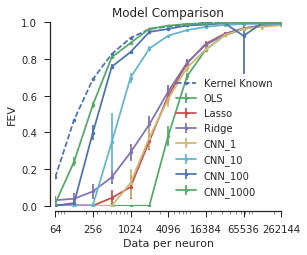

In [185]:
# Load results
#IF completed
with open('CNN_fixed','rb') as file:
    CNN = pickle.load(file)
#ELSE check how many complete repetitions in CNN_running
#with open('CNN_running','rb') as file:
#    run = pickle.load(file)
#print('numbers show complete repetitions, blocks=neurons,rows=data,columns=regularization',
#      sum(run['FEV'][:,:,:,:]!=0))
# choose number c of complete repetitions:
C=20#completed repetitions
FEV=CNN['FEV'][:C,:,:,:]
VAL=CNN['MSE_val'][:C]

#Numbers of neurons,data,regularization,runs...
Neurons=CNN['N']
data_set=CNN['data_set']
Reg=CNN['r']
N=len(Neurons)
D=len(data_set)
R=len(Reg[0,:])

#MSE on validation set
MSE_val=np.zeros([C,N,D,R])
avg_val = np.zeros([N,D,R])
std_val = np.zeros([N,D,R])

#FEV - fraction of explainable variance explained
avg_fev = np.zeros([N,D])
std_fev = np.zeros([N,D])

#best regularization strength on validation set
best_r = np.zeros([N,D])
best_r_ind = np.zeros([N,D])

#Calculate MSE_val and best (median over all repetitions) regularization per Neurons and Data
for n in range(N):
    for d in range(D):
        tmp=np.zeros(C)#index of best r for each repetition
        for c in range(C):
            for r in range(R):
                MSE_val[c,n,d,r] = np.min(VAL[c][n][d][r])
            tmp[c] = np.int(np.argmin(MSE_val[c,n,d,:]))
        best_r_ind[n,d] = np.median(tmp)
        best_r[n,d] = Reg[n, np.int(best_r_ind[n,d])]

# Plotting
sns.set(font_scale=1)
fig_size = [18,18]
plt.rcParams["figure.figsize"] = fig_size
        
#Plot CNN Performance
for n in range(N):
    for d in range(D):
        ind = np.int(best_r_ind[n,d])
        avg_fev[n,d] = np.mean(FEV[:,n,d,ind].clip(min=0))#clip at zero to keep FEV interpretation coherent?
        std_fev[n,d] = np.std(FEV[:,n,d,ind].clip(min=0))
    plt.errorbar(data_set,avg_fev[n,:],std_fev[n,:],marker='o')
ax=plt.gca()
ax.set_xscale("log", basex=2, nonposx='clip')
ax.set_xticks(data_set)
plt.title('CNN Performance')
plt.legend(Neurons)
plt.show()

##REGULARIZATION CHECKS
for n in range(N):
    for d in range(D):
        for r in range(R):
            avg_val[n,d,r] = np.mean(MSE_val[:,n,d,r])
            std_val[n,d,r] = np.std(MSE_val[:,n,d,r])
        #Plot
        ax = plt.subplot(N,D,n*D+d+1)
        plt.errorbar(Reg[n,:],avg_val[n,d,:],std_val[n,d,:])
        plt.title('D = $2^{%s}$ \n r=%s'%(d+6,np.round(best_r[n,d],decimals=4)))
        ax.set_xscale("log", nonposx='clip')
        ax.get_xaxis().set_visible(False)
        ax.set_ylabel('FEV')
plt.show()

sns.reset_orig()


# ----- Comparison with GLMs -----

with open('GLM_homogeneous','rb') as file:
    GLM = pickle.load(file)

r_las = GLM['r_las']
r_rid = GLM['r_rid']
FEVl = GLM['FEV_lasso']
FEVr = GLM['FEV_rid']
FEVo = GLM['FEV_ols']
Rl=len(r_las)
Rr=len(r_rid)

avg_fevo = np.zeros(D)
std_fevo = np.zeros(D)
avg_fevl = np.zeros([D,Rl])
std_fevl = np.zeros([D,Rl])
avg_fevr = np.zeros([D,Rr])
std_fevr = np.zeros([D,Rr])

for d in range(D):
    avg_fevo[d] = np.mean(FEVo[d,:].clip(min=0))
    std_fevo[d] = np.std(FEVo[d,:].clip(min=0))
    for r in range(Rl):
        avg_fevl[d,r] = np.mean(FEVl[d,r,:].clip(min=0))
        std_fevl[d,r] = np.std(FEVl[d,r,:].clip(min=0))
    for r in range(Rr):
        avg_fevr[d,r] = np.mean(FEVr[d,r,:].clip(min=0))
        std_fevr[d,r] = np.std(FEVr[d,r,:].clip(min=0))


##PERFORMANCE COMPARISON
sns.set(font_scale=1)  # crazy big
sns.set_style('ticks')
fig_size = np.array([6,5])/2.54*12/7
plt.rcParams["figure.figsize"] = fig_size

fig,ax = plt.subplots(1,1)

#OLS
plt.errorbar(data_set,avg_fevo,std_fevo,marker='.')
ax.set_ylabel('FEV')
ax.set_xlabel('Data per neuron')
#Lasso
tmp_y = np.zeros(D)#plotting variable
tmp_sd = np.zeros(D)#plotting variable
for d in range(D):
    tmp_ind = np.argmax(avg_fevl[d,:])
    tmp_y[d] = avg_fevl[d,tmp_ind]
    tmp_sd[d] = std_fevl[d,tmp_ind]

ax.errorbar(data_set,tmp_y,tmp_sd,marker='.')
#Ridge
tmp_y = np.zeros(D)#plotting variable
tmp_sd = np.zeros(D)#plotting variable
for d in range(D):
    tmp_ind = np.argmax(avg_fevr[d,:])
    tmp_y[d] = avg_fevr[d,tmp_ind]
    tmp_sd[d] = std_fevr[d,tmp_ind]

ax.errorbar(data_set,tmp_y,tmp_sd,marker='.')

ax.set_xscale("log", nonposx='clip')
ax.set_xticks(data_set)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


##CNN
for n in range(N):
    ax.errorbar(data_set,avg_fev[n,:],std_fev[n,:],marker='.')
    
#format for publication
ax.set_xscale("log", nonposx='clip')
ax.set_xticks(data_set[::2])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.title('Model Comparison')
ax.legend(['Kernel Known','OLS','Lasso','Ridge','CNN_1','CNN_10','CNN_100','CNN_1000'])
ax.set_xlim([64,2**18])
ax.set_ylim([0,1])
sns.despine(offset=5,trim=True)
plt.show()
fig.savefig('fig3a.pdf')
sns.reset_orig()


# ------ Add Kernel-known curve ?----
#with open('./CNN_kernel-known_fixed','rb') as file:
#    KK = pickle.load(file)
# same as above: choose number of completed repetitions:
C=20#completed repetitions
FEV=KK['FEV'][:C,:,:,:]
VAL=KK['MSE_val'][:C]

#Numbers of neurons,data,regularization,runs...
Neurons=KK['N']
data_set=KK['data_set']
Reg=KK['r']
N=len(Neurons)
D=len(data_set)
R=len(Reg[0,:])

#MSE on validation set
MSE_val=np.zeros([C,N,D,R])
avg_val = np.zeros([N,D,R])
std_val = np.zeros([N,D,R])

#FEV - fraction of explainable variance explained
avg_fev = np.zeros([N,D])
std_fev = np.zeros([N,D])

#best regularization strength on validation set
best_r = np.zeros([N,D])
best_r_ind = np.zeros([N,D])

#Calculate MSE_val and best (median over all repetitions) regularization per Neurons and Data
for n in range(N):
    for d in range(D):
        tmp=np.zeros(C)#index of best r for each repetition
        for c in range(C):
            for r in range(R):
                MSE_val[c,n,d,r] = np.min(VAL[c][n][d][r])
            tmp[c] = np.int(np.argmin(MSE_val[c,n,d,:]))
        best_r_ind[n,d] = np.median(tmp)
        best_r[n,d] = Reg[n, np.int(best_r_ind[n,d])]

# Plotting
sns.set(font_scale=1)
fig_size = [18,18]
plt.rcParams["figure.figsize"] = fig_size
        
#Plot CNN Performance
for n in range(N):
    for d in range(D):
        ind = np.int(best_r_ind[n,d])
        avg_fev[n,d] = np.mean(FEV[:,n,d,ind].clip(min=0))#clip at zero to keep FEV interpretation coherent?
        std_fev[n,d] = np.std(FEV[:,n,d,ind].clip(min=0))
    plt.errorbar(data_set,avg_fev[n,:],std_fev[n,:],marker='o')
ax=plt.gca()
ax.set_xscale("log", basex=2, nonposx='clip')
ax.set_xticks(data_set)
plt.title('CNN Performance')
plt.legend(Neurons)
plt.show()

##REGULARIZATION CHECKS
for n in range(N):
    for d in range(D):
        for r in range(R):
            avg_val[n,d,r] = np.mean(MSE_val[:,n,d,r])
            std_val[n,d,r] = np.std(MSE_val[:,n,d,r])
        #Plot
        ax = plt.subplot(N,D,n*D+d+1)
        plt.errorbar(Reg[n,:],avg_val[n,d,:],std_val[n,d,:])
        plt.title('D = $2^{%s}$ \n r=%s'%(d+6,np.round(best_r[n,d],decimals=4)))
        ax.set_xscale("log", nonposx='clip')
        ax.get_xaxis().set_visible(False)
        ax.set_ylabel('FEV')
plt.show()

sns.reset_orig()

## Fig 3c: Plot learned filters

In [ ]:
# run Plot Results first!
# Show at which amounts of data:
show = [2**8,2**10,2**12]

# load, unless already done above
#with open('CNN_fixed','rb') as file:
#    CNN = pickle.load(file)
#with open('GLM_homogeneous','rb') as file:
#    GLM = pickle.load(file)
    
s = CNN['sk'][0]

# random run:
run_rand = np.random.randint(C)

fig,ax = plt.subplots(7,len(show))
    
for i in range(len(show)):
    #GLMs
    ind = np.where(np.array(GLM['data_set'])==show[i])[0][0]#index
    ols = GLM['Wo'][ind,run_rand,:,:]
    ax[0,i].imshow(ols.reshape([s,s]))
    lasso = GLM['Wl'][ind,np.argmax(avg_fevl[ind,:]),run_rand,:,:]
    ax[1,i].imshow(lasso.reshape([s,s]))
    ridge = GLM['Wr'][ind,np.argmax(avg_fevr[ind,:]),run_rand,:,:]
    ax[2,i].imshow(ridge.reshape([s,s]))
    #CNNs
    ind = np.where(np.array(CNN['data_set'])==show[i])[0][0]#index
    cnn1 = CNN['WK'][run_rand][0][ind][best_r_ind[0,ind].astype(int)]
    ax[3,i].imshow(cnn1.reshape([s,s]))
    cnn10 = CNN['WK'][run_rand][1][ind][best_r_ind[1,ind].astype(int)]
    ax[4,i].imshow(cnn10.reshape([s,s]))
    cnn100 = CNN['WK'][run_rand][2][ind][best_r_ind[2,ind].astype(int)]
    ax[5,i].imshow(cnn100.reshape([s,s]))
    cnn1000 = CNN['WK'][run_rand][3][ind][best_r_ind[3,ind].astype(int)]
    ax[6,i].imshow(cnn1000.reshape([s,s]))